In [1]:
import numpy as np;
import scipy;
import seaborn as sns;
import pandas as pd;
import matplotlib.pyplot as plt;
from collections import defaultdict

In [5]:
import sprt as sprt
import numpy as np

test = sprt.SPRTNormal(alpha = 0.05, beta = 0.2, h0 = 0, h1 = 1, 
values = np.random.normal(0, 1, 10), 
variance = 1)

Decision:	Accept

    values  lower  upper
n                       
1    1.082 -1.058  3.273
2    2.022 -0.558  3.773
3    1.133 -0.058  4.273
4    0.658  0.442  4.773
5    1.994  0.942  5.273
6    0.036  1.442  5.773
7    0.671  1.942  6.273
8    0.406  2.442  6.773
9    0.784  2.942  7.273
10   0.573  3.442  7.773


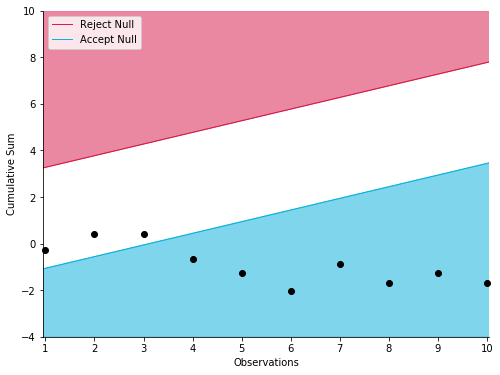

In [3]:
test.plot()


In [31]:
class SPRT:
    def __init__(self, alpha, beta, sigma, h0, h1, data=[]):
        self.data = data
        self.alpha = alpha
        self.beta = beta
        self.h0 = h0
        self.h1 = h1
        self.sigma = sigma
        self.a = np.log(self.beta / (1 - self.alpha))
        self.b = np.log((1 - self.beta) / self.alpha)
        
    def test(self, verbose=False):
        if verbose:
            print("x\tlower\tupper")
        a = np.log(self.beta / (1 - self.alpha))
        b = np.log((1 - self.beta) / self.alpha)
        n = 0
        total_x = 0
        for i, x in enumerate(self.data, 1):
            total_x += x
            n += i
            lower = a * self.sigma * self.sigma / (self.h1 - self.h0) + i * (self.h0 + self.h1) / 2
            upper = b * self.sigma * self.sigma / (self.h1 - self.h0) + i * (self.h0 + self.h1) / 2
            if verbose:
                print(str(x) + "\t" + str(lower) + "\t" + str(upper))
            if x <= lower:
                return "Accept H0"
            elif x >= upper:
                return "Accept H1"

In [36]:
sprt = SPRT(alpha = 0.05, beta = 0.2, h0 = 0, h1 = 2, data = np.random.normal(0, 1, 10), sigma = 1)

In [37]:
sprt.test(verbose=True)

x	lower	upper
0.4064417687337118	6.1947680772558185	5.653426409720027


'Accept H0'